
# **Marketing Campaign for Banking Products**



---



**Data Description:**
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.


**Data:** https://www.kaggle.com/itsmesunil/bank-loan-modelling/download




**Context:**
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.


**Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal
loans.



**1.1**. **Importing** **Libraries**

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**1.2 Importing Dataset**

In [244]:
df=pd.read_csv("/content/Bank_Personal_Loan_Modelling - Data.csv")

**1.3 Analysing Data**

In [245]:
# Displaying first 5 rows
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [246]:
# Displaying Shape i.e no of rows and columns
df.shape

(5000, 14)

In [247]:
# Displaying Conscise summary of the dataframe
# Here, We can see the datatypes of the attributes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [248]:
# Displaying statistical details of our dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0





Here we can see the type of data we have.We can see count,mean,standard deviation,distribution of data,maximum and minimum value for the same. 
We can see that Experience column has a negative value as its minimum. It shouldn't have such value. It means there is a fault in our data. We need to correct it if we want to use it in our prediction.
All the other column looks good to go.




In [249]:
# Checking if our columns have null or missing values present 
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

We see that there are no missing values present in any of the columns of our dataset. So we are good to go , Else we would have had to fill missing values with some other values like 0,mean or median values.

**2.1 Cleaning Dataset**

We saw earlier that Experience column had faulty data. There maybe a need for us to change thode negative values in that column. We have a intuition that Age and Experience are correlated , If they are highly  correlated, they would cause collinearity problems. So we check for collinearity of columns in our dataset

In [250]:
# Calculating correlation between attributes
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


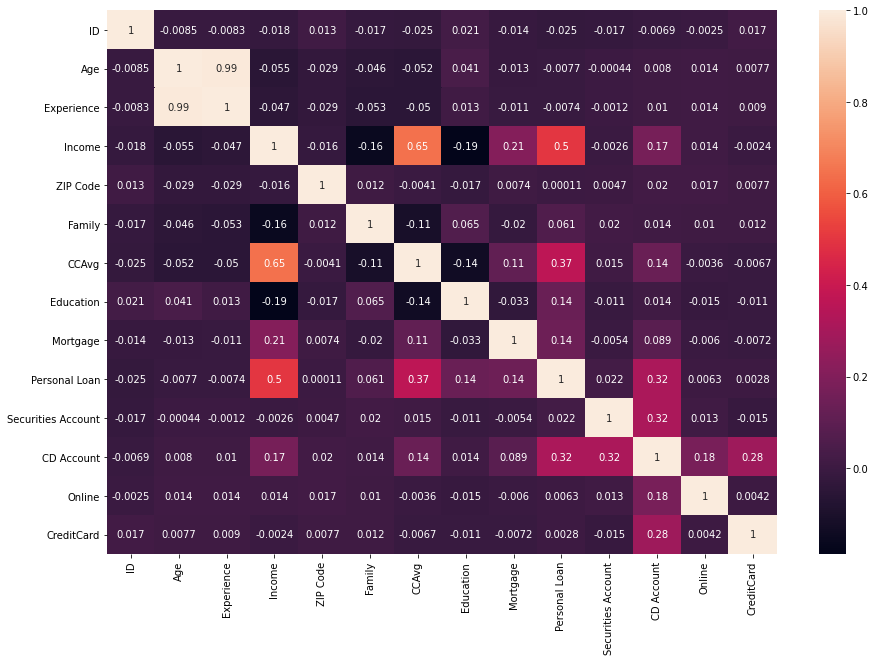

In [251]:
# Visualizing the correlation in a better way through a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Our intuition about Age and experience was correct, They are highly correlated. So we should drop one of the columns.
Since Experience column has faulty data we can drop Experience.
Other columns are not much correlated with one another.
We drop Id as well because it is not something which can affect our prediction. 

In [252]:
# Dropping Experience and ID column
df=df.drop(['Experience','ID'],axis=1)

In [253]:
# Just checking the columns after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


 **3. Exlploratory Data Analysis**

**3.1 Number Of uniques in each column**

In [254]:
# Displaying unique values in  each column
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

We can see many of the columns have binary values like Personal Loan, Securities Account, CD account, Online, Credit Card.


**3.2 No of rows with 0 values or particular columns**

In [255]:
# Displaying No of People with zero mortgage
df['Mortgage'].isin([0]).sum()

3462

In [256]:
# Displaying No of People With Zero Credit Spendings per month
df['CCAvg'].isin([0]).sum()

106

**3.3 Value Counts Of All Categorical Columns**

In [257]:
print(df['Education'].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64


In [258]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [259]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [260]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [261]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [262]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [263]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

**3.4 Univariate Analysis**
**Continous variables**

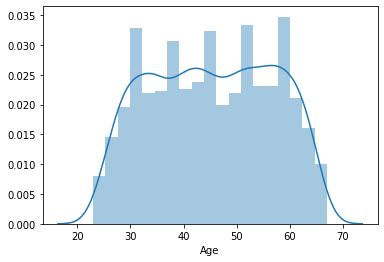

In [264]:
sns.distplot(df['Age'])

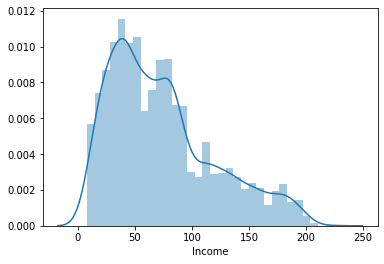

In [265]:
sns.distplot(df['Income'])

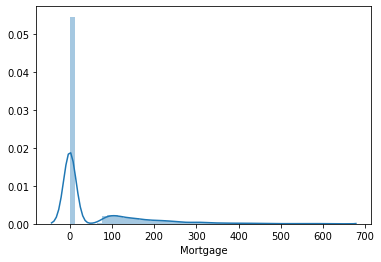

In [266]:
sns.distplot(df['Mortgage'])

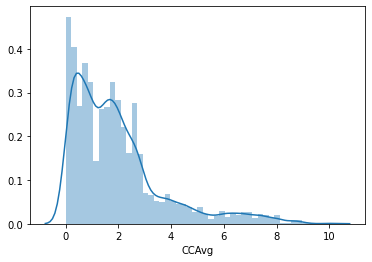

In [267]:
sns.distplot(df['CCAvg'])

**Univariate analysis Categorical variables**

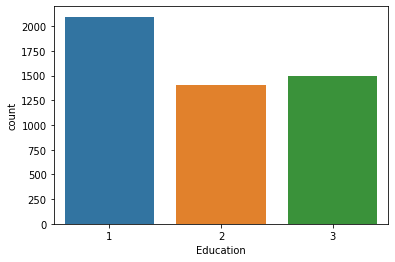

In [268]:
sns.countplot(df['Education'])

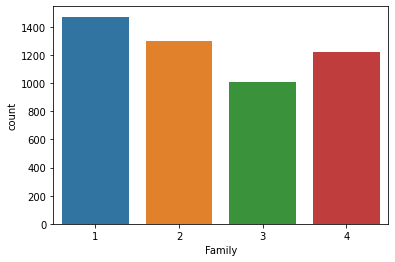

In [269]:
sns.countplot(df['Family'])

**Multivariate Analysis**

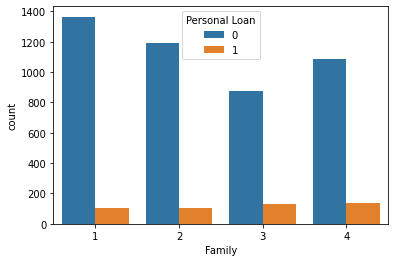

In [270]:
sns.countplot(x=df['Family'],hue=df['Personal Loan'])

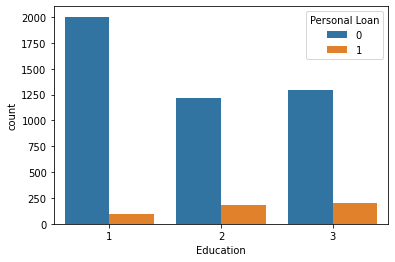

In [271]:
sns.countplot(x=df['Education'],hue=df['Personal Loan'])

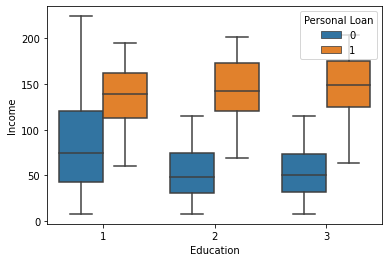

In [272]:
sns.boxplot(df['Education'],df['Income'],hue=df['Personal Loan']);

In [273]:
# Displaying correlation values of other variables with Personal Loan for which we are building the model.
df.corr().loc['Personal Loan',:].sort_values(ascending=False) 

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Age                  -0.007726
Name: Personal Loan, dtype: float64

**4. Applying necessary transformation for feature variables**

We see that Personal Loan is highly affected by Income, CCavg, CD Account. Mortgage, Family,Securities Account affect less than the above mentioned variables.
Then, Online,Credit Card, Age doesn't affect Personal loan that much.
So we drop them to reduce complexity. 



In [274]:
# Dropping columns that won't afect much our algorithm.
df=df.drop(['Age','ZIP Code','CreditCard','Online'],axis=1)


In [275]:
# Displaying data which we will use for our classifiers
df.head(5) 

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,49,4,1.6,1,0,0,1,0
1,34,3,1.5,1,0,0,1,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,0


**5. Normalization of data and splitting into training test sets.**

In [276]:
# Breaking our data into input variable X and output variable y
X=df.drop(['Personal Loan'],axis=1)
y=df['Personal Loan']




In [277]:
# Importing necessary variables
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [278]:
# Scaling our data so taht they have values in between 0 and 1 
x = X.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6
0,0.189815,1.000000,0.16,0.0,0.000000,1.0,0.0
1,0.120370,0.666667,0.15,0.0,0.000000,1.0,0.0
2,0.013889,0.000000,0.10,0.0,0.000000,0.0,0.0
3,0.425926,0.000000,0.27,0.5,0.000000,0.0,0.0
4,0.171296,1.000000,0.10,0.5,0.000000,0.0,0.0
...,...,...,...,...,...,...,...
4995,0.148148,0.000000,0.19,1.0,0.000000,0.0,0.0
4996,0.032407,1.000000,0.04,0.0,0.133858,0.0,0.0
4997,0.074074,0.333333,0.03,1.0,0.000000,0.0,0.0
4998,0.189815,0.666667,0.05,0.5,0.000000,0.0,0.0


In [279]:
#Splitting our data into 70:30 training:test purpose
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

**6. Logistic Regression**

In [280]:
# Building Logistic regression Model
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
logi_y_pred=model.predict(X_test)


**7. Classifier's Perfromance**

In [281]:
## Analysing our classifier's performance
Logistic_accuracy=accuracy_score(y_test,logi_y_pred)
Logistic_F1=f1_score(y_test,logi_y_pred)
print("\nAccuracy Score:",Logistic_accuracy)
print("\nF1 score:",Logistic_F1)
print("\nConfusion Matrix:\n",confusion_matrix(y_test,logi_y_pred,labels=[0,1]))
print("\nClassification Report:\n",classification_report(y_test,logi_y_pred))


Accuracy Score: 0.942

F1 score: 0.6561264822134387

Confusion Matrix:
 [[1330   13]
 [  74   83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.86      0.53      0.66       157

    accuracy                           0.94      1500
   macro avg       0.91      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



F1 score is low It shows we have poor prescision and recall.
It can be improved.

**8.1 Kneighbors Classifier**

In [282]:
# Building KNeighbor Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train,y_train)
KNN_y_pred=model_KNN.predict(X_test)


In [283]:
## Analysing our classifier's performance
KNN_accuracy=accuracy_score(y_test,KNN_y_pred)
KNN_F1=f1_score(y_test,KNN_y_pred)
print("\nAccuracy Score:",KNN_accuracy)
print("\nF1 score:",KNN_F1)
print("\nConfusion Matrix:\n",confusion_matrix(y_test,KNN_y_pred,labels=[0,1]))
print("\nClassification Report:\n",classification_report(y_test,KNN_y_pred))


Accuracy Score: 0.976

F1 score: 0.8775510204081631

Confusion Matrix:
 [[1335    8]
 [  28  129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.94      0.82      0.88       157

    accuracy                           0.98      1500
   macro avg       0.96      0.91      0.93      1500
weighted avg       0.98      0.98      0.98      1500



We checked Kneighbor Classifier's performance with 2,3,5,7 neighbors. 

For 2 neighbors Accuracy was 0.97 and F1 score was 0.83

For 3 neighbors Accuracy was 0.976 and F1 score was 0.877

For 5 neighbors Accuracy was 0.9713 and f1 score was 0.84

For 7 neighbors Accuracy was 0.96 and F1 score was 0.82

We also checked for 4,6 But we found KNeighbor Classifier with 3 neighbor as better among them .

Also KNeighbor Classifier showed more accuracy and F1 score than Logistic regression.

**8.2 Random Forest Classifier** 

In [284]:
# Buliding Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
rf_y_pred=model_rf.predict(X_test)

In [285]:
## Analysing our classifier's performance
RF_accuracy=accuracy_score(y_test,rf_y_pred)
RF_F1=f1_score(y_test,rf_y_pred)
print("\nAccuracy Score:",RF_accuracy)
print("\nF1 score:",RF_F1)
print("\nConfusion Matrix:\n",confusion_matrix(y_test,rf_y_pred,labels=[0,1]))
print("\nClassification Report:\n",classification_report(y_test,rf_y_pred))


Accuracy Score: 0.984

F1 score: 0.9205298013245035

Confusion Matrix:
 [[1337    6]
 [  18  139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.96      0.89      0.92       157

    accuracy                           0.98      1500
   macro avg       0.97      0.94      0.96      1500
weighted avg       0.98      0.98      0.98      1500



Random Forest Classifier showed much better performance than KNN as well as Logistic Regression. Accuracy of 0.984 and F1 score of 0.92 .

Accuracy and F1 score was seen as best among the 3 classifiers.

**9. Business Understanding**

We Worked on 3 classifiers. Out of which we think Random Forest worked better for us. 
Random Forest model can successfully be used to predict the likelihood of a liability customer buying personal loans.

In [286]:
results={'Logistic Regression':[Logistic_accuracy,Logistic_F1],'Kneighbor':[KNN_accuracy,KNN_F1],'Random Forest':[RF_accuracy,RF_F1]}
results=pd.DataFrame(results,index=['Accuracy','F1 Score'])
results

,Logistic Regression,Kneighbor,Random Forest
Accuracy,0.942000,0.976000,0.98400
F1 Score,0.656126,0.877551,0.92053
